In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

$$\hat{y} = mx_i + b $$

$$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

## Updating parameters

$$C = \frac{1}{n} \sum u^2$$
$$u = \hat{y_i}-y_i $$

$\frac{\partial C}{\partial u}$ =  $\frac{2}{n} \sum(\hat{y_i}-y_i)$

$\frac{\partial u}{\partial \hat{y_i}}$ = 1

$\frac{\partial \hat{y_i}}{\partial b}$ = 1

$\frac{\partial \hat{y_i}}{\partial m}$ = $xi$

## Derive $\frac{\partial C}{\partial m}$ and $\frac{\partial C}{\partial b}$

$\frac{\partial C}{\partial b}$ = $\frac{\partial C}{\partial u} \frac{\partial u}{\partial \hat{y_i}} \frac{\partial \hat{y_i}}{\partial b} = \frac{2}{n} \sum(\hat{y_i}-y_i) $


$\frac{\partial C}{\partial m}$ = $\frac{\partial C}{\partial u} \frac{\partial u}{\partial \hat{y_i}} \frac{\partial \hat{y_i}}{\partial m} = \frac{2}{n} \sum(\hat{y_i}-y_i).{x_i} $


In [2]:
X, y = make_regression(n_samples=100, n_features=1, random_state=0, noise = 15)

In [3]:
X = X.flatten()

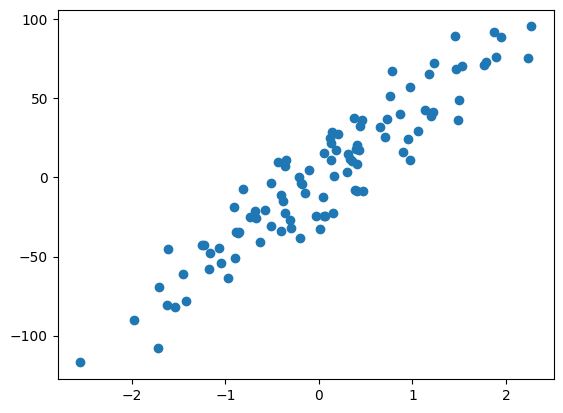

In [4]:
plt.scatter(X, y)

In [5]:
def regression(my_x, my_m, my_b):
  return my_m * my_x + my_b

def mse(my_yhat, my_y): 
    sigma = np.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)
  
def gradient_descent(L, m_now, b_now, my_y, my_x):
    n = len(my_x)
    yhat = regression(my_x, m_now, b_now)
    m_gradient = (2/n) * np.sum(my_x * (yhat - my_y))
    b_gradient = (2/n) * np.sum(yhat - my_y)
    m = m_now - L * m_gradient
    b = b_now - L * b_gradient
    return m, b

In [6]:
epochs = 1000
L = 0.01
m = 0
b = 0

for epoch in range(epochs):
  y_hat = regression(X, m, b)
  cost = mse(y_hat, y)
  m, b = gradient_descent(L, m, b, y, X)

  print(f'Epoch: {epoch}, Cost: {cost}, m: {m}, b: {b}')

Epoch: 0, Cost: 2113.972297784079, m: 0.8698518350412467, b: 0.02669412232864995
Epoch: 1, Cost: 2039.0116325384943, m: 1.7219371374786299, b: 0.05181387996946997
Epoch: 2, Cost: 1967.0869246850257, m: 2.556620015856995, b: 0.07541201183737595
Epoch: 3, Cost: 1898.074813620968, m: 3.374257092165632, b: 0.09753976653679536
Epoch: 4, Cost: 1831.8569670968036, m: 4.175197656257362, b: 0.11824694112299763
Epoch: 5, Cost: 1768.319875633321, m: 4.959783817072951, b: 0.13758191890348792
Epoch: 6, Cost: 1707.3546553681672, m: 5.728350650737136, b: 0.15559170630248437
Epoch: 7, Cost: 1648.8568589852503, m: 6.481226345591155, b: 0.17232196881095935
Epoch: 8, Cost: 1592.7262943947226, m: 7.218732344225352, b: 0.1878170660441975
Epoch: 9, Cost: 1538.8668508449325, m: 7.941183482574068, b: 0.20212008592830913
Epoch: 10, Cost: 1487.1863321609026, m: 8.648888126133766, b: 0.2152728780366332
Epoch: 11, Cost: 1437.596296816451, m: 9.342148303364057, b: 0.22731608609647386
Epoch: 12, Cost: 1390.01190455

In [7]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).min()
    y_max = regression(x_max, my_m, my_b).max()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

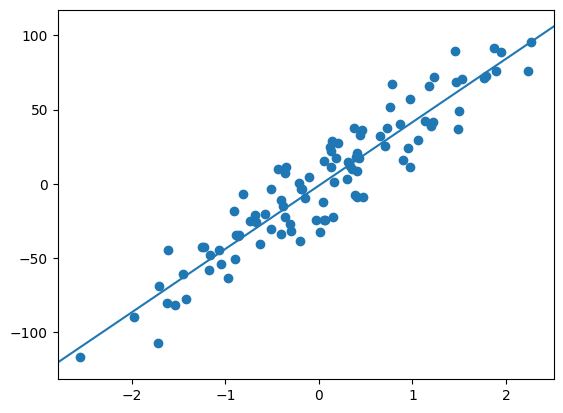

In [8]:
regression_plot(X, y, 42.736, -1.221)

In [13]:
y_hat = regression(X, m, b)
cost = mse(y_hat, y)
cost

256.8858438784384

In [14]:
print(f'm:{m}, b:{b}')

m:42.736392911308634, b:-1.221272645192363


### Buil-in Solution

In [10]:
reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [11]:
reg.coef_

array([42.73639301])

In [12]:
reg.intercept_

-1.221272740546088